# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "71d4e9c405acc3f595ff62eaf96806127d921292"
connection.set_access_token(API_TOKEN)

Access token is valid.


# Strategy Creation

## Import Strategy from pyaglostrategypool

In [ ]:
! wget -O inverse_ema_scalping_crossover.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/inverse_ema_scalping_regular_order/_strategy.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' inverse_ema_scalping_crossover.py

In [5]:
from inverse_ema_scalping_crossover import InverseEMAScalpingRegularOrder as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 133800,
 'strategyId': '568bc41d0b44434299382020d2a69ea0'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('MARUTI', exchange='NSE')
instrument

[{'id': 111759, 'value': 'NSE:JAYBARMARU'},
 {'id': 8, 'value': 'NSE:MARUTI'},
 {'id': 1674237, 'value': 'NSE:MARUTI.AF'},
 {'id': 1674311, 'value': 'NSE:MARUTI.BL'},
 {'id': 1674456, 'value': 'NSE:MARUTI.RL'},
 {'id': 30173, 'value': 'NSE:MARUTI20NOV4800CE'},
 {'id': 30174, 'value': 'NSE:MARUTI20NOV4800PE'},
 {'id': 30175, 'value': 'NSE:MARUTI20NOV4900CE'},
 {'id': 30176, 'value': 'NSE:MARUTI20NOV4900PE'},
 {'id': 30177, 'value': 'NSE:MARUTI20NOV5000CE'}]

## Setup Parameters

In [9]:
parameters = {
  'SMALLER_TIME_PERIOD': 12,
  'LARGER_TIME_PERIOD': 20,
}

In [10]:
initial_virtual_funds = 70000     # in Rupees

## Backtesting

### Start

In [11]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 +0530', 
    end='2023-07-31 15:30 +0530', 
    instrument='NSE:MARUTI', 
    lots=3,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds

)


Starting the strategy 'Inverse EMA Scalping Regular Order Strategy' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════════════════════════════════╕
│ Config                  │ Value                                                 │
╞═════════════════════════╪═══════════════════════════════════════════════════════╡
│ Strategy Name           │ Inverse EMA Scalping Regular Order Strategy           │
├─────────────────────────┼───────────────────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                                           │
├─────────────────────────┼───────────────────────────────────────────────────────┤
│ Instrument(s)           │ ['NSE:MARUTI']                                        │
├─────────────────────────┼───────────────────────────────────────────────────────┤
│ Quantity/Lots           │ 3                                                     │
├─────────────────────────┼─────────────────────────────────────────

### Status

In [12]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [13]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (10)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]

In [14]:
print(logs)

[2023-10-23 18:26:19] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-10-23 18:26:20] Sanity checks on cfg successful.
[2023-10-23 18:26:20] Currency set to "INR"
[2023-10-23 18:26:20] Setting up broker connection...
[2023-10-23 18:26:21] Broker connection has been setup successfully.
[2023-10-23 18:26:21] (NSE_EQ) Funds available in client's ABVIRTUALBROKER account is : INR '70000.00'
[2023-10-23 18:26:21] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-10-23 18:26:21] Welcome ALGOBULLS VIRTUAL USER!
[2023-10-23 18:26:21] Reading strategy...
[2023-10-23 18:26:21] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  ####### ### #     #  #####     
 #     #    #      # #   # 

### Stop

In [15]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


### Profit and Loss Reports

In [16]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,pnl_absolute,pnl_cumulative_absolute,brokerage,net_pnl
0,NSE,MARUTI,2021-08-03 12:15:00+05:30,SELL,3,₹,7143.10,2021-08-03 15:30:00+05:30,BUY,3,₹,7195.85,-158.25,-158.25,0,-158.25
1,NSE,MARUTI,2021-08-05 11:15:00+05:30,BUY,3,₹,7032.45,2021-08-05 15:30:00+05:30,SELL,3,₹,7023.95,-25.50,-183.75,0,-25.50
2,NSE,MARUTI,2021-08-06 13:15:00+05:30,SELL,3,₹,7131.20,2021-08-06 15:30:00+05:30,BUY,3,₹,7097.90,99.90,-83.85,0,99.90
3,NSE,MARUTI,2021-08-09 11:15:00+05:30,BUY,3,₹,7091.90,2021-08-09 15:30:00+05:30,SELL,3,₹,7081.90,-30.00,-113.85,0,-30.00
4,NSE,MARUTI,2021-08-30 14:15:00+05:30,SELL,3,₹,6798.00,2021-08-30 15:30:00+05:30,BUY,3,₹,6796.45,4.65,-109.20,0,4.65
5,NSE,MARUTI,2021-09-08 12:15:00+05:30,BUY,3,₹,6792.00,2021-09-08 15:30:00+05:30,SELL,3,₹,6779.20,-38.40,-147.60,0,-38.40
6,NSE,MARUTI,2021-09-13 13:15:00+05:30,SELL,3,₹,6862.95,2021-09-13 15:30:00+05:30,BUY,3,₹,6872.00,-27.15,-174.75,0,-27.15
7,NSE,MARUTI,2021-09-21 10:15:00+05:30,BUY,3,₹,6771.80,2021-09-21 15:30:00+05:30,SELL,3,₹,6775.10,9.90,-164.85,0,9.90
8,NSE,MARUTI,2021-09-24 12:15:00+05:30,SELL,3,₹,7005.50,2021-09-24 15:30:00+05:30,BUY,3,₹,6957.15,145.05,-19.80,0,145.05
9,NSE,MARUTI,2021-10-01 11:15:00+05:30,BUY,3,₹,7150.75,2021-10-01 15:30:00+05:30,SELL,3,₹,7169.50,56.25,36.45,0,56.25


### Statistics Reports

#### Statistics

In [17]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-03
End Period          2023-07-31
Risk-Free Rate      0.0%
Time in Market      89.0%

Cumulative Return   -7.15%
CAGR﹪              -3.65%

Sharpe              -2.26
Prob. Sharpe Ratio  3.69%
Sortino             -2.63
Sortino/√2          -1.86
Omega               0.64

Max Drawdown        -7.74%
Longest DD Days     629

Gain/Pain Ratio     -0.38
Gain/Pain (1M)      -0.65

Payoff Ratio        0.66
Profit Factor       0.64
Common Sense Ratio  0.52
CPC Index           0.21
Tail Ratio          0.82
Outlier Win Ratio   4.37
Outlier Loss Ratio  4.32

MTD                 -0.79%
3M                  -1.5%
6M                  -2.78%
YTD                 -2.86%
1Y                  -4.01%
3Y (ann.)           -3.65%
5Y (ann.)           -3.65%
10Y (ann.)          -3.65%
All-time (ann.)     -3.65%

Avg. Drawdown       -2.03%
Avg. Drawdown Days  174
Recovery Factor     -0.92
Ulcer Index         0.04
Serenity Index  

#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-03
End Period                 2023-07-31
Risk-Free Rate             0.0%
Time in Market             89.0%

Cumulative Return          -7.15%
CAGR﹪                     -3.65%

Sharpe                     -2.26
Prob. Sharpe Ratio         3.69%
Smart Sharpe               -2.01
Sortino                    -2.63
Smart Sortino              -2.35
Sortino/√2                 -1.86
Smart Sortino/√2           -1.66
Omega                      0.64

Max Drawdown               -7.74%
Longest DD Days            629
Volatility (ann.)          6.15%
Calmar                     -0.47
Skew                       -1.31
Kurtosis                   4.83

Expected Daily %           -0.06%
Expected Monthly %         -0.31%
Expected Yearly %          -2.44%
Kelly Criterion            -27.98%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.69%
Expected Shortfall (cVaR)  -0.69%

Max Consecutive W

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-11-09,2023-07-31,2023-07-31,629,-7.741985,-7.552703
2,2021-10-06,2021-10-07,2021-10-28,21,-0.207321,-0.103874
3,2021-08-09,2021-09-13,2021-09-24,46,-0.130013,-0.115853
4,2021-08-05,2021-08-05,2021-08-06,1,-0.036511,0.000000


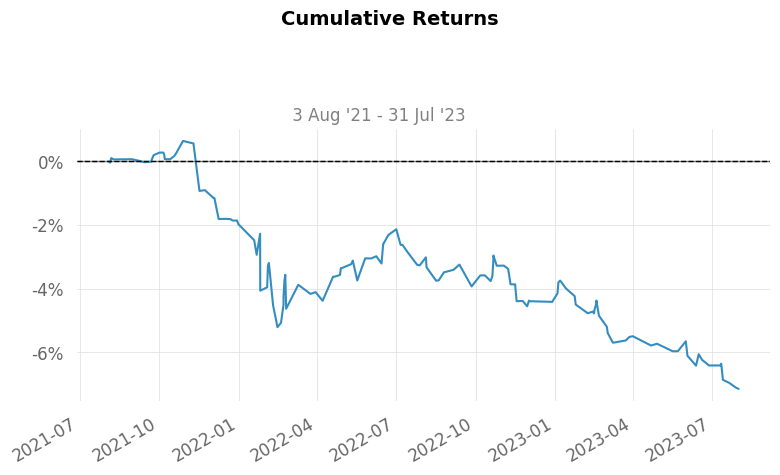

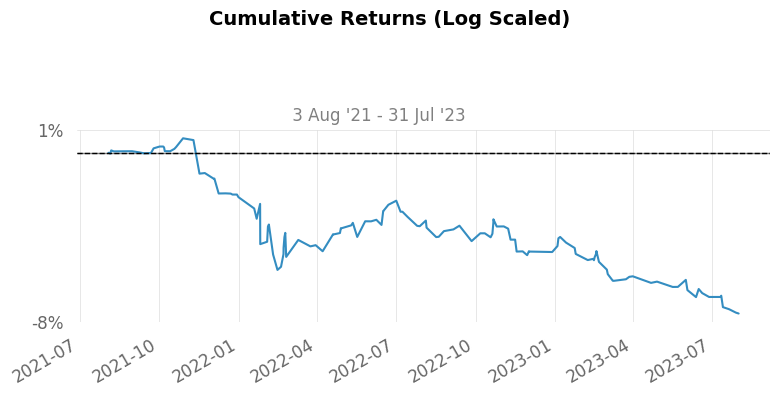

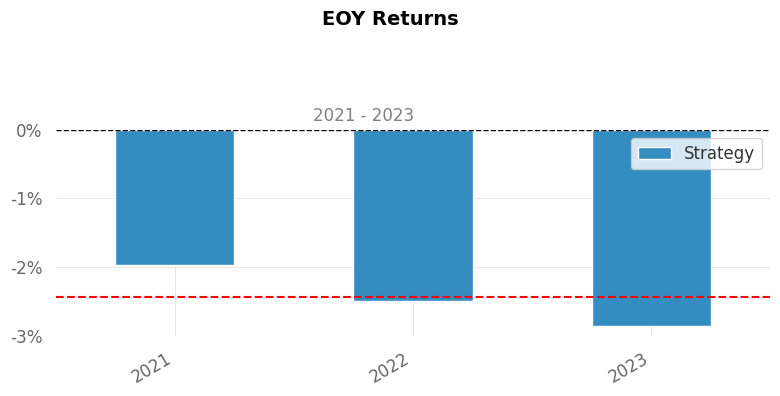

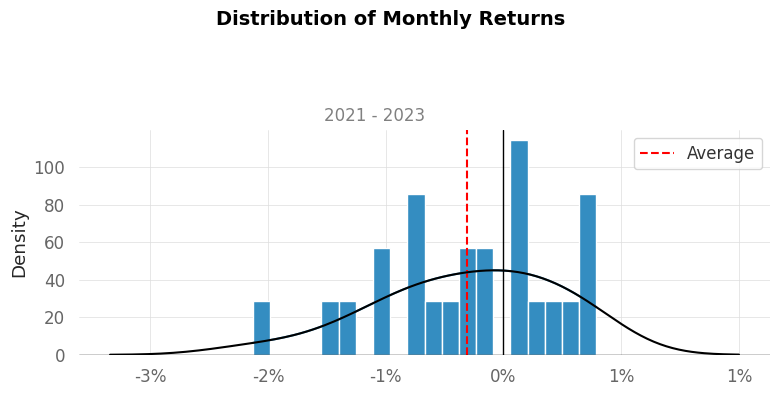

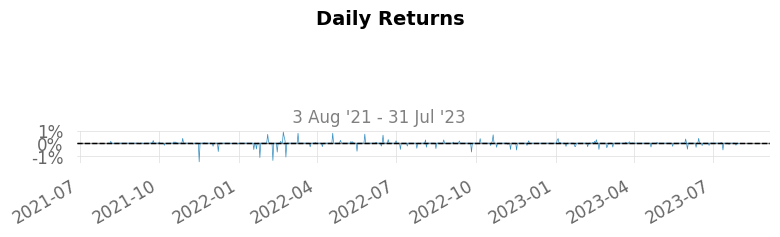

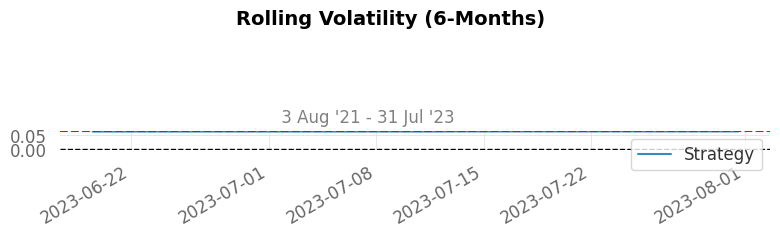

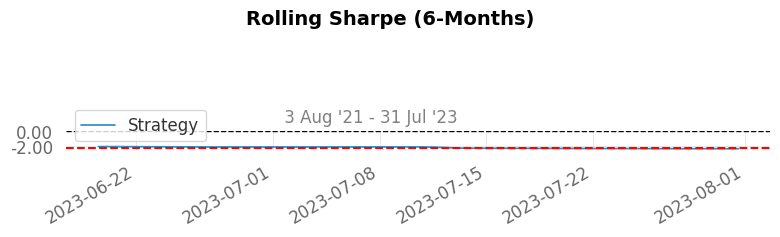

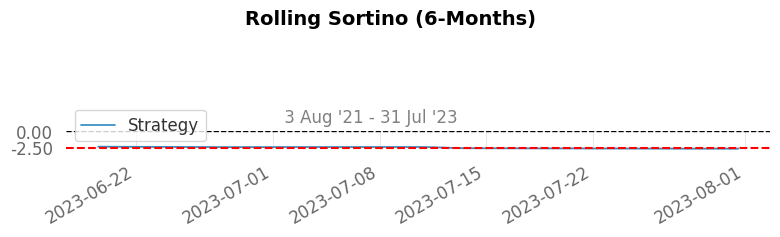

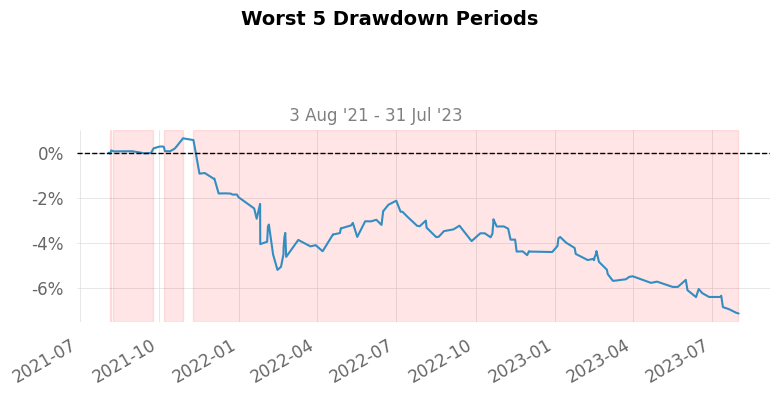

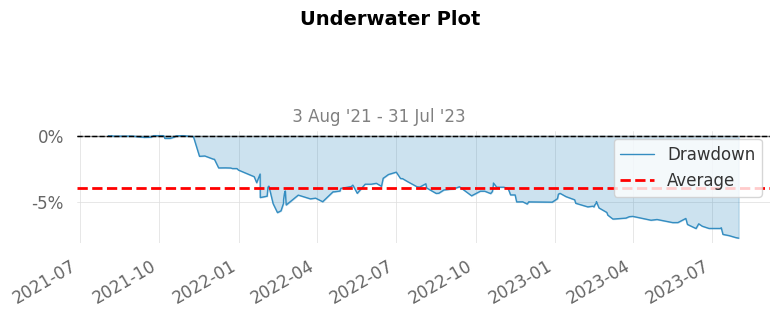

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


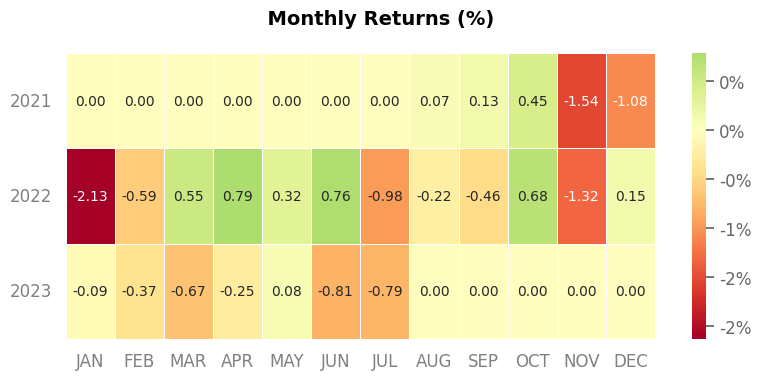

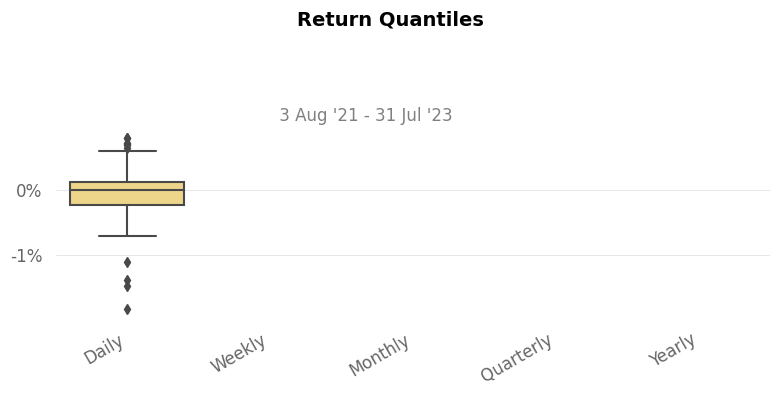

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [18]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True )

### Order History

In [19]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | 33f9148a7dcf4b81b7eea8262285a556 |
| Transaction Type | BUY                              |
| Instrument       | NSE:MARUTI                       |
| Quantity         | 3                                |
| Price            | ₹9819.9                          |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2023-10-23T13:00:18.196683Z | COMPLETE               |
| 2023-10-23T13:00:18.196666Z | OPEN                   |
| 2023-10-23T13:00:18.196647Z | OPEN PENDING           |
| 2023-10-23T13:00:18.196625Z | VALIDATION PENDING     |
| 2023-10-23T13:00:18.196560Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | a522f42c94e4402db

---

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 +0530', 
    end='15:00 +0530',  
    instruments='NSE:MARUTI', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Paper Trading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

---